In [2]:
import numpy as np

In [3]:
# with open('../../chapter-8/sentiment-analysis/neg/1_1.txt') as f:
#     print(f.readline())

Robert DeNiro plays the most unbelievably intelligent illiterate of all time. This movie is so wasteful of talent, it is truly disgusting. The script is unbelievable. The dialog is unbelievable. Jane Fonda's character is a caricature of herself, and not a funny one. The movie moves at a snail's pace, is photographed in an ill-advised manner, and is insufferably preachy. It also plugs in every cliche in the book. Swoozie Kurtz is excellent in a supporting role, but so what?<br /><br />Equally annoying is this new IMDB rule of requiring ten lines for every review. When a movie is this worthless, it doesn't require ten lines of text to let other readers know that it is a waste of time and tape. Avoid this movie.


In [3]:
wordsList = np.load('../../chapter-8/sentiment-analysis/wordsList.npy')
print('载入word列表')
wordsList = wordsList.tolist()
wordsList = [word.decode('UTF-8') for word in wordsList]
wordVectors = np.load('../../chapter-8/sentiment-analysis/wordVectors.npy')
print('载入文本向量')

print(len(wordsList))
print(wordVectors.shape)

载入word列表
载入文本向量
400000
(400000, 50)


In [4]:
home_index = wordsList.index('home')
wordVectors[home_index]

array([ 2.3302e-01,  4.5885e-01,  2.6602e-01,  3.8204e-02,  5.6694e-01,
       -5.1194e-01, -1.7831e+00,  4.3072e-01,  1.3246e-03,  1.7852e-02,
       -5.1549e-01, -5.4466e-01, -2.5115e-01, -3.7632e-01,  4.0969e-01,
        7.0356e-02, -2.6120e-01, -2.7769e-03, -5.1361e-01,  2.9828e-01,
        1.4496e-01,  5.3748e-01, -6.2443e-01,  4.1379e-01, -2.2006e-01,
       -1.6277e+00,  2.9026e-01, -1.8530e-02,  5.1004e-01, -6.1231e-01,
        3.2380e+00,  7.4873e-01,  1.8835e-01,  2.2167e-02,  5.7824e-01,
        5.2022e-01,  1.5287e-01,  4.1601e-01,  5.5260e-01, -4.0373e-01,
       -1.8057e-01,  2.0914e-01, -2.3873e-01,  1.1284e-01, -7.4940e-03,
        5.7918e-01, -4.3641e-01, -8.0904e-01,  2.0410e-01, -1.9532e-01],
      dtype=float32)

In [1]:
import os
from os.path import isfile, join

pos_files = ['../../chapter-8/sentiment-analysis/pos/' + f
            for f in os.listdir('../../chapter-8/sentiment-analysis/pos/')
            if isfile(join('../../chapter-8/sentiment-analysis/pos/', f))]
neg_files = ['../../chapter-8/sentiment-analysis/neg/' + f
            for f in os.listdir('../../chapter-8/sentiment-analysis/neg/')
            if isfile(join('../../chapter-8/sentiment-analysis/neg/', f))]
num_words = []
for pf in pos_files:
    with open(pf, 'r', encoding='UTF-8') as f:
        line = f.readline()
        counter = len(line.split())
        num_words.append(counter)
print('正面评价完结')

for nf in neg_files:
    with open(nf, "r", encoding='utf-8') as f:
        line = f.readline()
        counter = len(line.split())
        num_words.append(counter)
print('负面评价完结')

num_files = len(num_words)
print('文件总数', num_files)
print('所有的词的数量', sum(num_words))
print('平均文件词的长度', sum(num_words) / len(num_words))

正面评价完结
负面评价完结
文件总数 25000
所有的词的数量 5844680
平均文件词的长度 233.7872


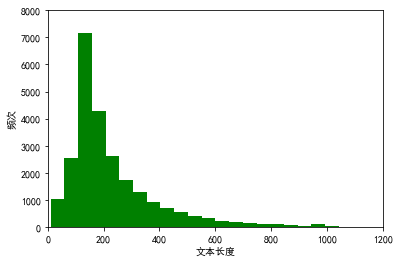

In [5]:
import matplotlib

matplotlib.use('qt4agg')
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
%matplotlib inline
matplotlib.pyplot.hist(num_words, 50, facecolor='g')
matplotlib.pyplot.xlabel('文本长度')
matplotlib.pyplot.ylabel('频次')
matplotlib.pyplot.axis([0, 1200, 0, 8000])
matplotlib.pyplot.show()

In [8]:
import re

strip_special_chars = re.compile('[^A-Za-z0-9 ]+')

def cleanSentences(string):
    string = string.lower().replace('<br />', ' ')
    return re.sub(strip_special_chars, '', string.lower())

max_seq_num = 300
ids = np.zeros((num_files, max_seq_num), dtype='int32')
file_count = 0
for pf in pos_files:
    with open(pf, 'r', encoding='UTF-8') as f:
        indexCounter = 0
        line = f.readline()
        cleanedLine = cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[file_count][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[file_count][indexCounter] = 399999
            indexCounter += 1
            if indexCounter >= max_seq_num:
                break
        file_count += 1

for nf in neg_files:
    with open(nf, 'r', encoding='UTF-8') as f:
        indexCounter = 0
        line = f.readline()
        cleanedLine - cleanSentences(line)
        split = cleanedLine.split()
        for word in split:
            try:
                ids[file_count][indexCounter] = wordsList.index(word)
            except ValueError:
                ids[file_count][indexCounter] = 399999
            indexCounter += indexCounter
            if indexCounter >= max_seq_num:
                break
        file_count += 1

np.save('idsMatrix', ids)

KeyboardInterrupt: 

In [10]:
from random import randint

def get_train_batch():
    labels = []
    arr = np.zeros([batch_size, max_seq_num])
    for i in range(batch_size):
        if(i % 2 == 0):
            num = randint(1, 11499)
            labels.append([1, 0])
        else:
            num = randint(13499, 24999)
            labels.append([0,1])
        arr[i] = ids[num-1: num]
    return arr, labels

def get_test_batch():
    labels = []
    arr = np.zeros([batch_size, max_seq_num])
    for i in range(batch_size):
        num = randint(11499, 13499)
        if(num <= 12499):
            labels.append([1, 0])
        else:
            labels.append([0, 1])
        arr[i] = ids[num-1: num]
    return arr, labels

In [11]:
batch_size = 24
lstm_units = 64
num_labels = 2
iterations = 100
lr = 0.001
num_dimensions = 300  # Dimensions for each word vector
ids = np.load('../../chapter-8/sentiment-analysis/idsMatrix.npy')

In [ ]:
import tensorflow as tf

tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batch_size, num_labels])
input_data = tf.placeholder(tf.int32, [batch_size, max_seq_num])
data = tf.Variable(
    tf.zeros([batch_size, max_seq_num, num_dimensions]), dtype=tf.float32)
data = tf.nn.embedding_lookupk(wordVectors, input_data)

lstmCell = tf.contrib.rnn.BasicLSTMCell(lstm_units)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.5)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

weight = tf.Variable(tf.truncated_normal([lstm_units, num_labels]))
bias = tf.Variable(tf.constant(0.1, shape=[num_labels]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer(lr).minimize(loss)

saver = tf.train.Saver()

with tf.Session() as sess:
    if os.path.exists('models') and os.path.exists('models/checkpoint'):
        saver.restore(sess, tf.train.latest_checkpoint('models'))
    else:
        if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
            init = tf.initialize_all_variables()
        else:
            init = tf.global_variables_initializer()
        sess.run(init)
    
    iterations = 100
    for step in range(iterations):
        next_batch, next_batch_labels = get_test_batch()
        if step % 20 == 0:
            print("step:", step, " 正确率:", (sess.run(
                accuracy, {input_data: next_batch, labels: next_batch_labels})) * 100)
            
    if not os.path.exists("models"):
        os.mkdir("models")
    save_path = saver.save(sess, "models/model.ckpt")
    print("Model saved in path: %s" % save_path)